# ***DATA SCIENCE HACKATHON 2023***

Loading and Importing Libraries

In [1]:
# Library installer
!pip install googletrans
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 7.1 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15735 sha256=bc8fee60d82db41622bf480289b87b2173ce500a812206f5de289b0e56168d67
  Stored in directory: /root/.cache/pip/wheels/27/f3/32/d4859d40071f07a5df0ab6fdc0076e78a8a786625dde2b4b2f
Successfully built googletrans
  

In [2]:
# Loading Libraries
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
from googletrans import Translator
from langdetect import detect_langs
import re
from sklearn.preprocessing import LabelEncoder
import numpy as np
from geopy.geocoders import Nominatim
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

#Twitter libs
import pandas as pd
import nltk
from googletrans import Translator
from textblob import TextBlob
from nltk.corpus import stopwords
import re
from wordcloud import WordCloud
import ipywidgets as widgets
from IPython.display import display


In [3]:
# Loading the data files
df_elevate = pd.read_csv('/content/elevatedetailed_v2.csv')
df_gemi = pd.read_excel('/content/gemi_v2.xlsx')

Data Preprocessing

In [4]:
# Merging the data files(Left join)
df_elevate_gemi = pd.merge(df_elevate, df_gemi, on='id', how='left')

In [5]:
# Replace blank space with _ 
# put the dataframes into a list

for col in df_elevate_gemi.columns:
  # check if the column name contains a space
  if ' ' in col:

    # rename the column by replacing spaces with underscores
    df_elevate_gemi.rename(columns={col: col.replace(' ', '_')}, inplace=True)

Handling List




In [6]:
# Function to seperate the items of the list and one-hot encode

def clean_and_encode(df, col_name, suffix):
    unique_values = df[col_name].unique()
    print(unique_values)
    null_values = df[col_name].isnull()
    print(null_values.sum())
    df[col_name + '_updated'] = df[col_name].replace('[]', '''['Other']''')
    unique_values_update = df[col_name + '_updated'].unique()
    print(unique_values_update)
    # convert the data to a list of lists
    df_list = df[col_name + '_updated'].apply(lambda x: eval(x)).tolist()
    # use MultiLabelBinarizer to perform one-hot encoding
    mlb = MultiLabelBinarizer()
    encoded_data = mlb.fit_transform(df_list)
    
    # create a new dataframe with the encoded data
    encoded_df = pd.DataFrame(encoded_data, columns= suffix + '_' + mlb.classes_)
    print(encoded_df)
    return encoded_df

In [7]:
# Passing the volumn values to the function

df_encoded_bm = clean_and_encode(df_elevate_gemi, 'BUSINESS_MODEL', 'BM')
df_encoded_fs = clean_and_encode(df_elevate_gemi, 'FUNDING_SOURCES', 'FS')
df_encoded_rm = clean_and_encode(df_elevate_gemi, 'REVENUE_MODEL', 'RM')
df_encoded_in = clean_and_encode(df_elevate_gemi, 'INDUSTRIES', 'INDUS')
df_encoded_th = clean_and_encode(df_elevate_gemi, 'TECHNOLOGY', 'TECH')

["['B2B', 'B2B2C']" "['B2B']" "['B2B', 'B2C']"
 "['B2B', 'B2B2C', 'B2C', 'B2G', 'C2C']" "['B2B', 'B2B2C', 'B2C']"
 "['B2B', 'B2B2C', 'B2G']" "['B2B2C']" "['B2B', 'B2G']" "['B2C']"
 "['B2B2C', 'B2C']" "['B2B', 'B2C', 'Other']"
 "['B2B', 'B2B2C', 'B2C', 'B2G']" "['B2B', 'B2B2C', 'C2C']"
 "['B2B2C', 'Other']" "['B2B', 'B2G', 'Other']"
 "['B2B', 'B2B2C', 'B2C', 'B2G', 'Other']"
 "['B2B', 'B2B2C', 'B2C', 'B2G', 'C2C', 'Other']" "['Other']" "['B2G']"
 "['B2B', 'B2C', 'B2G']" '[]' "['B2B2C', 'B2G']"
 "['B2B', 'B2B2C', 'B2C', 'Other']" "['B2B', 'Other']"
 "['B2B', 'B2C', 'C2C']" "['B2C', 'C2C']" "['B2C', 'B2G']"
 "['B2B', 'B2B2C', 'B2C', 'C2C']" "['C2C']" "['B2B2C', 'B2C', 'B2G']"]
0
["['B2B', 'B2B2C']" "['B2B']" "['B2B', 'B2C']"
 "['B2B', 'B2B2C', 'B2C', 'B2G', 'C2C']" "['B2B', 'B2B2C', 'B2C']"
 "['B2B', 'B2B2C', 'B2G']" "['B2B2C']" "['B2B', 'B2G']" "['B2C']"
 "['B2B2C', 'B2C']" "['B2B', 'B2C', 'Other']"
 "['B2B', 'B2B2C', 'B2C', 'B2G']" "['B2B', 'B2B2C', 'C2C']"
 "['B2B2C', 'Other']" "['B2B'

In [8]:
# Concat the encoded dataframes
df_encoded = pd.concat([df_encoded_bm, df_encoded_fs, df_encoded_rm, df_encoded_in, df_encoded_th], axis=1)

# merge the encoded dataframe with the original dataframe
df_elevate_gemi = pd.concat([df_elevate_gemi, df_encoded], axis=1)

Handling Dictionary

In [9]:
# Replacing null or empty values with default value

df_elevate_gemi['FUNDING'].fillna("[{'title': 'None', 'amount': 'None', 'year': '0', 'type': 'None'}]", inplace=True)

In [10]:
# Function to seperate the dictionary items and encode them

def extract_data(row):
    if isinstance(row, str):
        row = eval(row)  # convert string to list of dictionaries
    elif np.isnan(row):
        return pd.Series({'title': np.nan, 'amount': np.nan, 'year': np.nan, 'type': np.nan})
    latest_year = max(row, key=lambda x: int(x['year']))['year']
    latest_dict = [d for d in row if d['year'] == latest_year][0]
    title_list = re.findall(r"[^',]+(?:[^',]+)*", latest_dict['title'])
    type_list = re.findall(r"[^',]+(?:[^',]+)*", latest_dict['type'])
    return pd.Series({'title': title_list, 'amount': latest_dict['amount'], 'year': latest_year, 'type': type_list})

In [11]:
# apply the function to the FUNDING column
df_elevate_gemi[['title', 'amount', 'year', 'type']] = df_elevate_gemi['FUNDING'].apply(extract_data)

In [12]:
# Applying the same fuction to other columns that require dictionary preprocessing

df_elevate_gemi['PATENTS_COUNT'] = df_elevate_gemi['PATENTS'].apply(lambda x: 0 if pd.isna(x) else x.count("'title'"))

df_elevate_gemi['AWARDS_COUNT'] = df_elevate_gemi['AWARDS'].apply(lambda x: 0 if pd.isna(x) else x.count("'title'"))

df_elevate_gemi['INCUBATIONS/ACCELERATIONS_COUNT'] = df_elevate_gemi['INCUBATIONS/ACCELERATIONS'].apply(lambda x: 0 if pd.isna(x) else x.count("'title'"))

Label encoding

In [13]:
# create an instance of the LabelEncoder class
encoder = LabelEncoder()

# encode the 'Funding_State' column
df_elevate_gemi['Funding_State'] = encoder.fit_transform(df_elevate_gemi['Funding_State'])

# print the resulting dataframe with the encoded 'Funding_State' column
print(df_elevate_gemi)

     Unnamed:_0.1  Unnamed:_0_x   id  \
0               0             0    1   
1               1             1   10   
2               2             2  100   
3               3             3  101   
4               4             4  102   
..            ...           ...  ...   
599           599           599   95   
600           600           600   96   
601           601           601   97   
602           602           602   98   
603           603           603   99   

                                      Corporate_Name_x  \
0                                  [i2.d] technologies   
1                                      A.D.W.K. ADWORK   
2                                          ENEXAN P.C.   
3                                           ENFORGE PC   
4                          Engineers For Business S.A.   
..                                                 ...   
599  BUTLAIR Electronic Communication and Advertisi...   
600                                    BUY THE MILE SA 

Handling Preprocessing of Gemi datasheet

In [14]:
# convert the columns to string type

df_elevate_gemi['value_of_share'] = df_elevate_gemi['value_of_share'].astype(str)
df_elevate_gemi['no_of_shares'] = df_elevate_gemi['no_of_shares'].astype(str)

# replace the euro symbol with a space in the 'value_of_share' column

df_elevate_gemi['value_of_share'] = df_elevate_gemi['value_of_share'].str.replace('€', '')
df_elevate_gemi['value_of_share'] = df_elevate_gemi['value_of_share'].str.replace(',', '')

# replace 'Ordinary' with 1 in the 'no_of_shares' column

df_elevate_gemi['no_of_shares'] = df_elevate_gemi['no_of_shares'].str.replace(',', '')
df_elevate_gemi['Date_Started_new'] = pd.to_datetime(df_elevate_gemi['Date_Started'],  format='%d/%m/%Y')

# Replace 'nan' strings with np.nan

df_elevate_gemi.replace('nan', np.nan, inplace=True)

# Convert the columns to numeric types

df_elevate_gemi['value_of_share'] = pd.to_numeric(df_elevate_gemi['value_of_share'])
df_elevate_gemi['no_of_shares'] = pd.to_numeric(df_elevate_gemi['no_of_shares'])

# Perform computations on the new dataframe

df_elevate_gemi['capital'] = df_elevate_gemi['value_of_share'] * df_elevate_gemi['no_of_shares']

# create a dictionary to map values to codes

legal_type_dict = {'Energy Community': 0, 'LLC':1, 'PC': 2, 'SA': 3, 'SOLE':4}
kind_of_shares_dict = { 'Anonymous':0, 'Anonymous Ordinary':1, 'Capital':2, 'Guarantee':3, 'non-Capital':4}

# use the dictionary to assign codes to the values in the Legal_Type column

df_elevate_gemi['Legal_Type_Code'] = df_elevate_gemi['Legal_Type'].map(legal_type_dict)
df_elevate_gemi['kind_of_shares_Code'] = df_elevate_gemi['kind_of_shares'].map(kind_of_shares_dict)

REGION Preprocessing

In [15]:
# Code to lower and strip regions from 'Region' Column
df_elevate_gemi["Region"] = (df_elevate_gemi["Region"].str.lower()).str.replace(r', greece', '')

# Code to replace all spelling errors in column values
value_corrections = {'ag paraskeyh': 'aghia paraskevi',
                    'aghia paraskevi, attikis': 'aghia paraskevi',
                    'aliartos viotia' : 'aliartos',
                    'analispi hersonisos': 'analispi',
                    'axarnes': 'acharnes',
                    'likovrisi - marousi ': 'lykovrysi',
                    'lycovrysi': 'lykovrysi',
                    'n. psyhiko athina': 'athina',
                    'neo psychico': 'neo',
                    'pilea': 'pylaia',
                    'pilea - thessaloniki': 'pylaia',
                    'pireas': 'piraeus',
                    'thesssaloniki': 'thessaloniki',
                    'thissions, athens': 'athens'}

df_elevate_gemi['Region'] = df_elevate_gemi['Region'].replace(value_corrections)

In [ ]:
# Getting ID, Region and New_region for the region dataframe:
# Initializing empty list
data = []

# Initialize the geocoder
geolocator = Nominatim(user_agent="regional-data")

#List
AdminRegion = ['Attica','Central Greece','Central Macedonia','Region of Crete','Eastern Macedonia and Thrace','Epirus','Ionian Islands','Northern Aegean','Peloponnese','South Aegean','Thessaly','Western Greece','Western Macedonia']

# iterate over the values in the 'Region' column and geocode each one
for index, row in df_elevate_gemi.iterrows():
    location = geolocator.geocode(row['Region'] + ", Greece", language="en")
    address = location.address
    new_region = 'others'
    
    if "Thessaly and Central Greece" in address:
        new_region = "Thessaly"
    else:
        for region in AdminRegion:
            if region in address:
                new_region = region
                break
                
    data.append([row['id'], row['Region'], address, new_region, location.latitude, location.longitude])

# create a pandas dataframe from the list
df_region = pd.DataFrame(data, columns=['id', 'Region', 'Address', 'New_Region', 'Latitude', 'Longitude'])

# print the dataframe
print(df_region.head())

In [ ]:
region_Data = df_region.drop(['Region','Address','Latitude', 'Longitude'],axis = 1)

In [67]:
# assuming both dataframes have an 'id' column
df_startup_data = pd.concat([df_elevate_gemi.set_index('id'), region_Data.set_index('id')], axis=1, join='inner').reset_index()

In [68]:
# Final preprocessed Dataframe for different analysis

df_startup_data.to_excel("df_startup_data_v1.xlsx", index=False)

TWITTER PREPROCESSING

In [1]:
# The below preprocessing for twitter takes approx 1 day to execute

In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english')

In [ ]:
def preprocess_tweet(tweet):
    # Remove all the special characters
    processed_tweet = re.sub(r'\W', ' ', tweet)

    # remove all single characters
    processed_tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_tweet)

    # Remove single characters from the start
    processed_tweet = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_tweet) 

    # Substituting multiple spaces with single space
    processed_tweet = re.sub(r'\s+', ' ', processed_tweet, flags=re.I)

    # Removing prefixed 'b'
    processed_tweet = re.sub(r'^b\s+', '', processed_tweet)

    # Removing stopwords
    processed_tweet = processed_tweet.lower().split()
    processed_tweet = [word for word in processed_tweet if not word in stop_words]
    processed_tweet = ' '.join(processed_tweet)
    
    return processed_tweet

In [ ]:
def translate_tweet(tweet):
    translator = Translator(service_urls=['translate.google.com'])
    try:
        translated_tweet = translator.translate(tweet, src='auto', dest='en').text
    except:
        translated_tweet = tweet
    
    return translated_tweet

In [ ]:
def classify_sentiment(tweet):
    blob = TextBlob(tweet)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        return 'Positive'
    elif sentiment < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [ ]:
def preprocess_and_classify_sentiments(dataset, tweet_column):
    dataset['processed_tweet'] = dataset[tweet_column].apply(preprocess_tweet)
    dataset['english_tweet'] = dataset['processed_tweet'].apply(translate_tweet)
    dataset['sentiment'] = dataset['english_tweet'].apply(classify_sentiment)
    return dataset

In [ ]:
dataset = pd.read_excel('Twitter_tweets.xlsx')

In [ ]:
result = preprocess_and_classify_sentiments(dataset, 'tweet')
result

In [ ]:
result.to_csv("Final_Processed_Tweets.csv")

In [ ]:
df = pd.read_excel("Twitter_profile.xlsx")
df.head()

In [ ]:
# merge the two dataframes based on the key columns
merged_df = pd.merge(result, df1, on='company_id')

In [ ]:
merged_df.head()

In [ ]:
merged_df.drop(columns=['Unnamed: 0'], inplace=True)
merged_df.to_csv('Final_Tweets.csv')

In [ ]:
df2 = pd.read_excel('Region_data_w_id.xlsx')
df2.head()

In [ ]:
# merge the two dataframes based on the key columns
merged_df2 = pd.merge(merged_df, df2, on='company_id')
merged_df2.head()

In [ ]:
# Final master database for Sentiment Analysis for the Twitter data
merged_df2.to_csv('Final_Tweets_with_Region.csv')

EDA Graphs

In [31]:
# Plots of the frequency of the occurences of each technology/industry/business_model/revenue_model/funding_source
sns.set_style('whitegrid')

def plot_count_with_prefix(df, prefix, title, ylabel):
    # compute column counts
    col_count = df.filter(like=prefix).sum(axis=0)
    col_count = col_count.sort_values(ascending=False)
    
    # remove prefix from column names
    category_names = [col.replace(prefix, '') for col in col_count.index]
    
    # create bar plot
    plt.figure(figsize=(12, 8))
    sns.barplot(x=col_count.values, y=category_names, palette='mako')
    plt.xlabel('Count')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

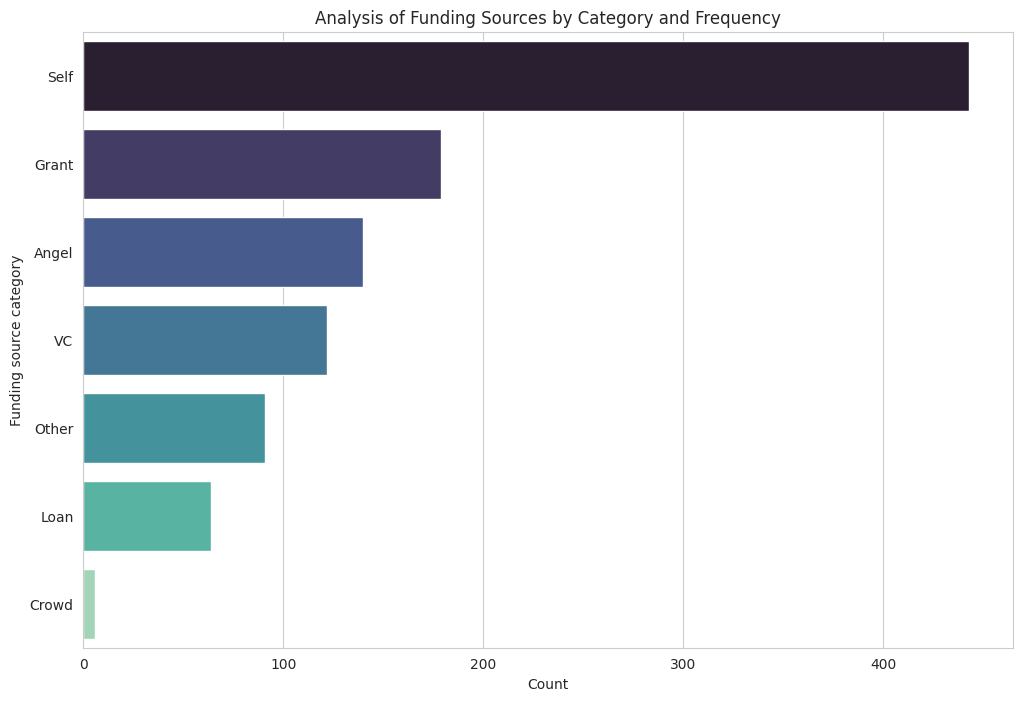

In [36]:
plot_count_with_prefix(df_startup_data, 'FS_', 'Analysis of Funding Sources by Category and Frequency','Funding source category')

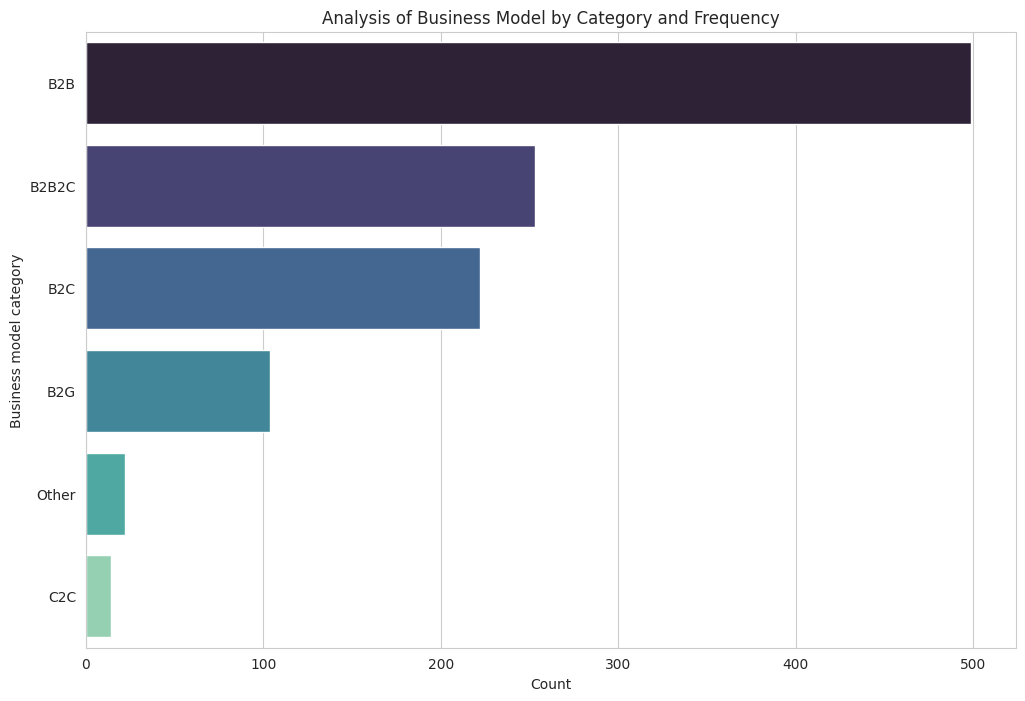

In [37]:
plot_count_with_prefix(df_encoded, 'BM_', 'Analysis of Business Model by Category and Frequency','Business model category')

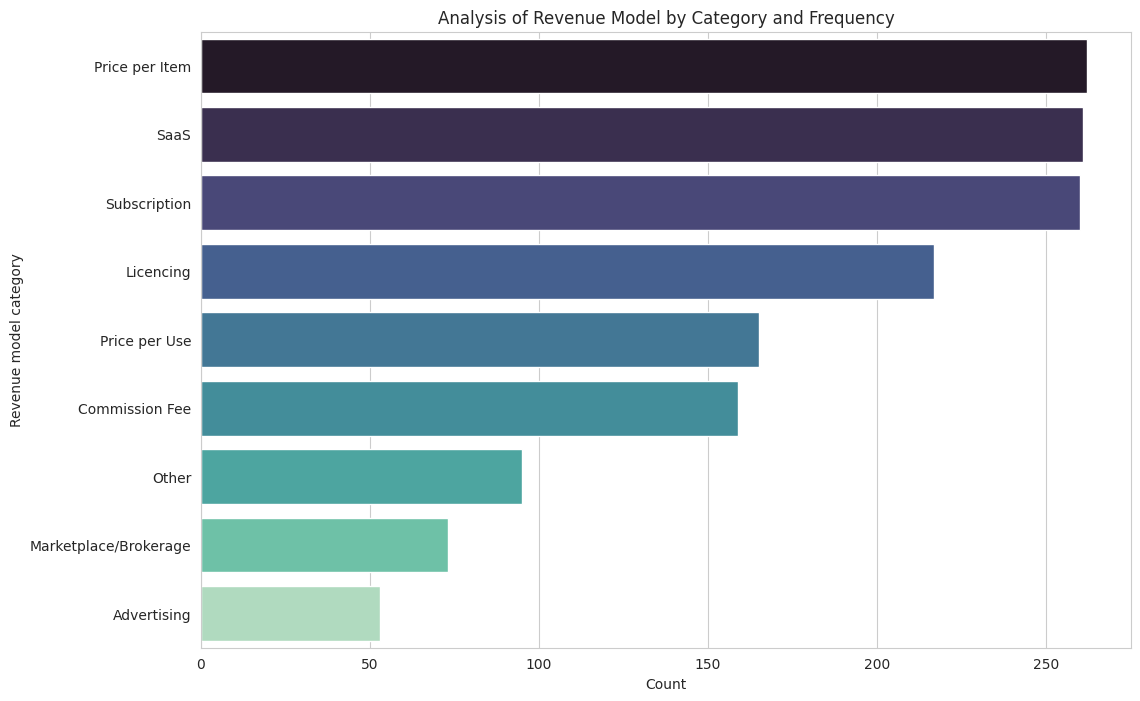

In [38]:
plot_count_with_prefix(df_encoded, 'RM_', 'Analysis of Revenue Model by Category and Frequency','Revenue model category')

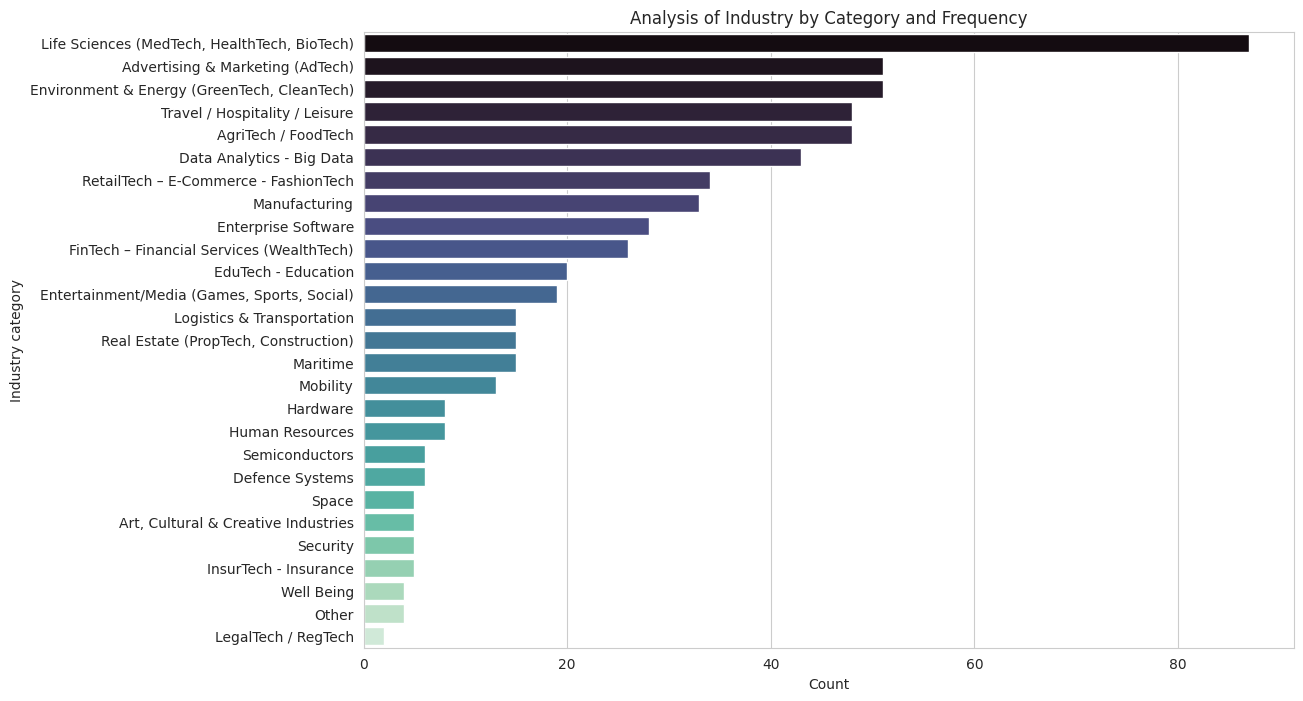

In [39]:
plot_count_with_prefix(df_encoded, 'INDUS_', 'Analysis of Industry by Category and Frequency','Industry category')

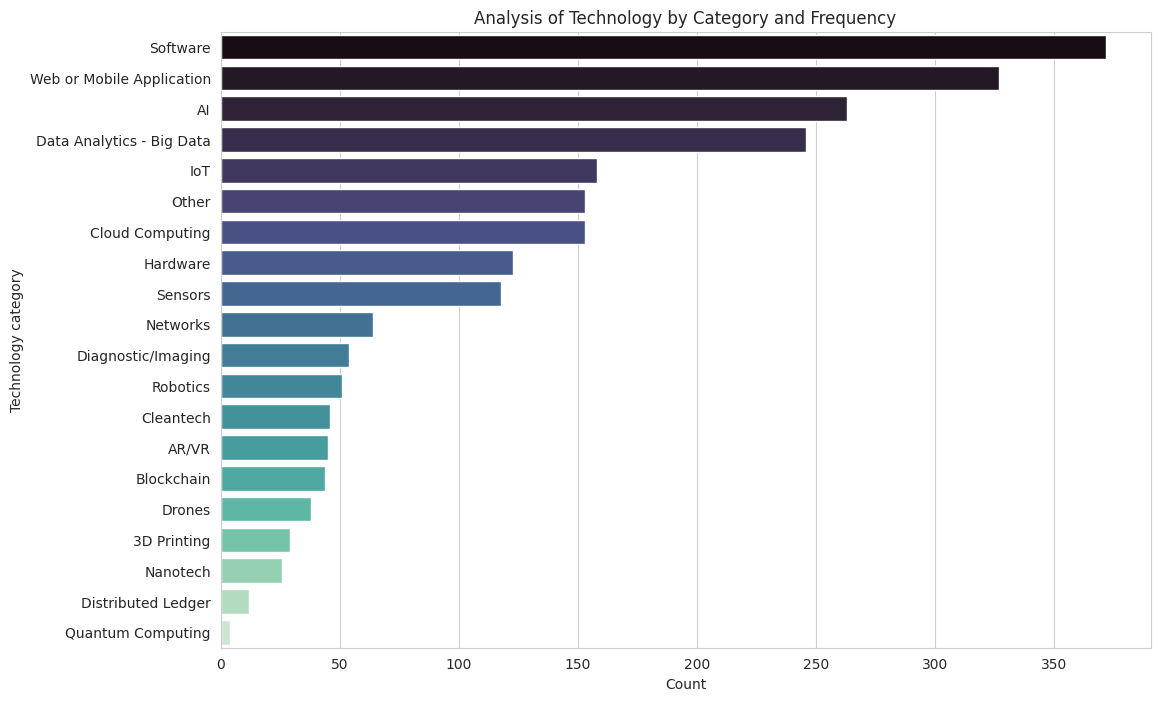

In [40]:
plot_count_with_prefix(df_encoded, 'TECH_', 'Analysis of Technology by Category and Frequency','Technology category')